<a href="https://colab.research.google.com/github/alekrul/RL/blob/main/ThompsomSamplingNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division
from builtins import range

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

In [ ]:
class Bandit:
  def __init__(self,true_mean):
    self.true_mean = true_mean
    self.predicted_mean = 0
    self.lambda_ = 1
    self.sum_x = 0
    self.tau = 1
    self.N = 0

  def pull(self):
    return np.random.randn()/np.sqrt(self.tau) + self.true_mean

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

  def update(self, x):
    self.lambda_ += self.tau
    self.sum_x += x
    self.predicted_mean = self.tau*self.sum_x/ self.lambda_
    self.N += 1

In [ ]:
def plot_results(bandits, trial):
  x = np.linspace(-3,6,200)
  for b in bandits:
    y = norm.pdf(x, b.predicted_mean, np.sqrt(1./b.lambda_))
    plt.plot(x,y, label=f"real mean: {b.true_mean:.4f}, num plays = {b.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()

In [ ]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_MEANS]

  sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    j = np.argmax([b.sample() for b in bandits])

    if i in sample_points:
      plot_results(bandits,i)
    
    x = bandits[j].pull()

    rewards[i] = x

    bandits[j].update(x)
  print("total reward earned:", rewards.sum())
  print("Overall win rate:", rewards.sum()/NUM_TRIALS)
  print("Num times selected each bandit", [b.N for b in bandits])

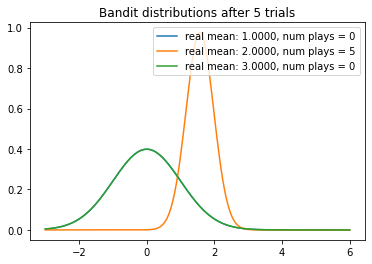

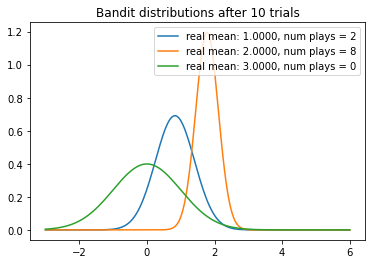

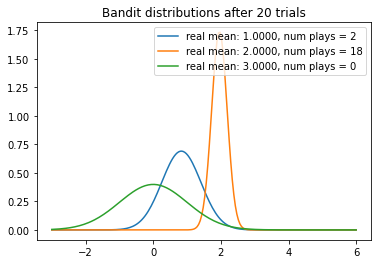

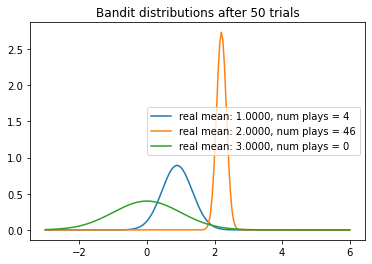

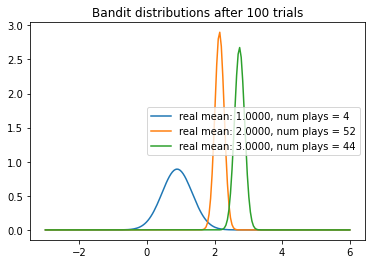

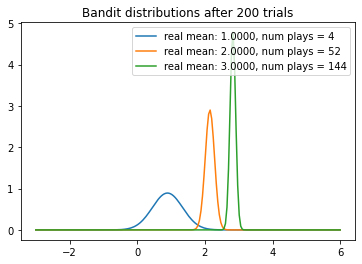

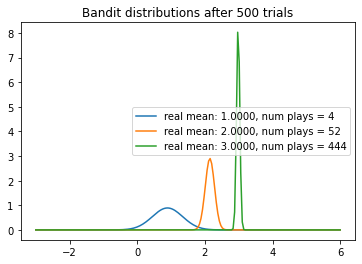

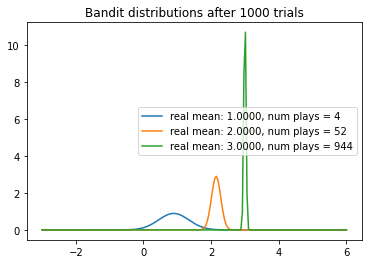

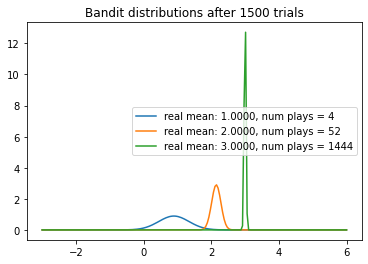

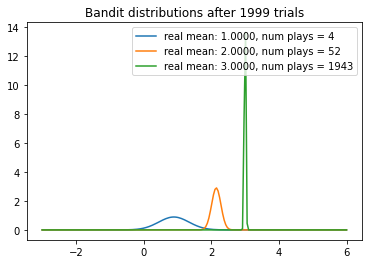

total reward earned: 5951.861679794587
Overall win rate: 2.9759308398972935
Num times selected each bandit [4, 52, 1944]


In [ ]:
experiment()